Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
Epoch 1/100
46/46 [==============================] - 4s 10ms/step - loss: 0.0189
Epoch 2/100
46/46 [==============================] - 1s 11ms/step - loss: 7.1221e-04
Epoch 3/100
46/46 [==============================] - 1s 11ms/step - loss: 3.9851e-04
Epoch 4/100
46/46 [==============================] - 0s 10ms/step - loss: 4.0069e-04
Epoch 5/100
46/46 [==============================] - 0s 11ms/step - loss: 3.9662e-04
Epoch 6/100
46/46 [==============================] - 1s 11ms/step - loss: 4.1632e-04
Epoch 7/100
46/46 [==============================] - 1s 11ms/step - loss: 3.9657e-04
Epoch 8/100
46/46 [==============================] - 0s 11ms/step - loss: 3.9171e-04
Epoch 9/100
46/46 [==============================] - 1s 12ms/step - loss: 3.8099e-04
Epoch 10/100
46/46 [==============================] - 1s 12ms/step - loss: 3.7434e-04
Epoch 11/100
46/46 [==============================] - 0s 11ms/step

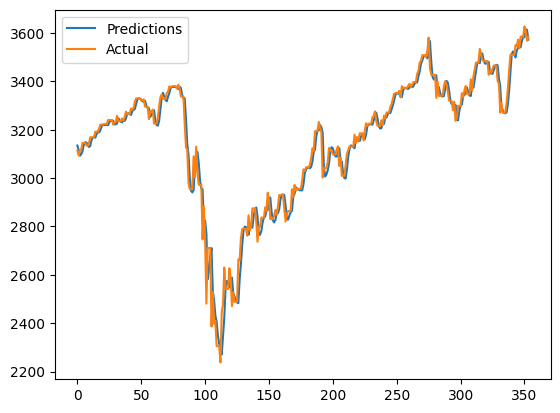

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv("yahoo_stock.csv")

# Check the column names in the dataset
print(data.columns)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))  # Assuming the column name is 'Close'

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Function to create sequences of input-output pairs
def create_dataset(dataset, time_steps):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Define the number of time steps
time_steps = 10

# Create input-output pairs for training and testing
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()


